In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N = 4
D = 2

# XOR
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1],
])
T = np.array([0, 1, 1, 0])

In [3]:
# ones = np.array([[1]*N]).T
ones = np.ones((N, 1))

In [17]:
# add a column of xy = x*y
xy = (X[:,0] * X[:,1]).reshape(N, 1)
Xb = np.concatenate((ones, xy, X), axis=1)

In [22]:
# randomly initialize the weights
w = np.random.randn(D + 2)

In [24]:
# calculate the model output
z = Xb.dot(w)

In [26]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [27]:
Y = sigmoid(z)

In [28]:
def cross_entropy(T,Y):
    Total_E = 0 
    
    for i in range(len(T)):
        E = -(T[i]*np.log(Y[i]) + (1-T[i])*np.log(1-Y[i]))
        Total_E = Total_E + E
    
    return Total_E 

In [29]:
# let's do gradient descent 100 times
learning_rate = 0.01
error = []
for i in range(10000):
    e = cross_entropy(T, Y)
    error.append(e)
    if i % 1000 == 0:
        print(e)

    # gradient descent weight udpate with regularization
    w += learning_rate * ( Xb.T.dot(T - Y) - 0.01*w )

    # recalculate Y
    Y = sigmoid(Xb.dot(w))

2.3853508990575802
1.47265110741127
1.1096543660072244
0.9084626495585054
0.7867838891616297
0.7084532580470919
0.6557062376533588
0.6190089345331108
0.5928610993304603
0.5738988747661109


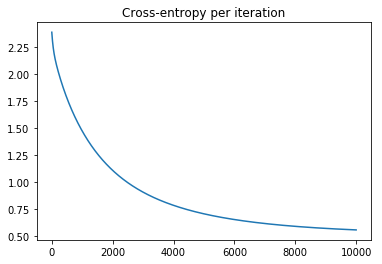

In [31]:
plt.plot(error)
plt.title("Cross-entropy per iteration")
plt.show()

In [32]:
print("Final w:", w)
print("Final classification rate:", 1 - np.abs(T - np.round(Y)).sum() / N)

('Final w:', array([-1.50109978, -7.74067428,  3.44176482,  3.4417647 ]))
('Final classification rate:', 1.0)
